### Задача 2

In [1]:
%matplotlib inline
import pylab
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import integrate
from scipy.misc import derivative
matplotlib.rcParams.update({'font.size': 22})
pylab.rcParams['figure.figsize'] = (14.0, 10.0)

Рассмотрим в данной задаче функцию $u(t) = \sqrt[3]{{sin}^2(t) + 10}$.

Соответвенно будем решать задачу:
$$u'(t) = f(t, u) = \frac{sin(2t)}{3u}$$ на отрезке $[0, 16]$ методом  Р-К 2-го порядка с таблицей Бутчера: 
$$
\begin{array}{c|cc}
0 & 0 & 0 \\
1 & 1/2 & 1/2\\
\hline
 & 1/2 & 1/2
\end{array}
$$

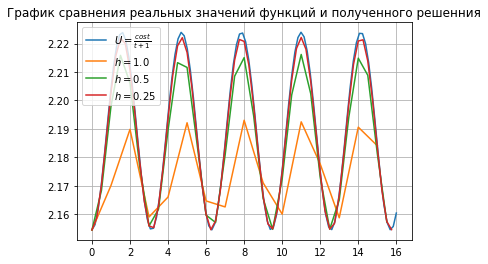

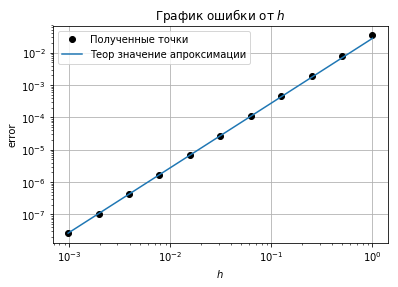

In [2]:
def f(t, u):     #задаем функцию f(t, u)
    return (np.sin(2*t)) / (3 * u**2)

def real_u(t):  #истинное значение функции U(t)
    return (np.sin(t)**2 + 10)**(1/3)

def NewtonProcedure(func):   #метод Ньютона поиска корня уравнения func(x) = 0
    epsilon = 1e+3
    prev = func(1)
    curr = prev - func(prev) / derivative(func, prev, n=1)
    while(np.abs(prev - curr) >= epsilon):
        prev = curr
        curr = curr - func(curr) / derivative(func, curr, n=1)
    return curr

a = 0  #левая граница отрезка
b = 16 #правая граница отрезка
T = b - a  #длина отрезка, на котором ищется решение
array_of_N = np.array([(1 << i) - 1 for i in range(4, 15)])  #это массив из кол-ва узлов на отрезке
errors = []   #массив ошибок 
a21 = 0.5 #задаем данные таблицы Бутчер
a22 = 0.5
k1 = 0
k2 = 0
c2 = 1
b1 = 0.5
b2 = 0.5
grid = np.linspace(a, b, 100)
plt.title("График сравнения реальных значений функций и полученного решенния")
plt.plot(grid, real_u(grid), label=r"$U = \frac{cost}{t + 1}$")
for N in array_of_N:
    U = np.zeros(N + 1)
    U[0] = real_u(a)   #считаем граничное значение
    h = T / (N + 1)  #считаем расстояние между узлами
    t = np.array([a + i * h for i in range(N + 1)])  #массив узлов
    for i in range(N):
        k1 = f(t[i], U[i])
        f_temp = lambda x: f(t[i] + c2 * h, U[i] + h * (a21 * k1 + a22 * x)) - x
        k2 = NewtonProcedure(f_temp)  #ищем k2 через уравнение Ньютона
        U[i + 1] = U[i] + h * (b1 * k1 + b2 * k2)
    errors.append(np.linalg.norm(U - real_u(t), np.inf))
    if (h >= 0.25):
        plt.plot(t, U, label=r"$h = $" + str(h))
plt.legend(loc=2)
plt.grid()
plt.figure()
plt.title(r"График ошибки от $h$")
h = (T / (array_of_N + 1))
plt.loglog(h, errors, 'ko', label="Полученные точки")
plt.loglog(h, errors[-1] * (h / h[-1])**2, label="Теор значение апроксимации")
plt.xlabel(r"$h$")
plt.ylabel(r"error")
plt.legend(loc=2)
plt.grid()